
## Minimum Norm Solution






## Inputs



(2, 'i_h2i_rate')

(3, 'i_pci_rate')

(5, 'i_ngi_rate')

(6, 'i_o2_volfract')

(8, 'i_h2_temp')

(9, 'i_hbtemp')

(10, 'i_wind_rt')


## Outputs


* desired output requirements 


(27, 'o_tgt')

(29, 'o_hmt')

(39, 'o_prod_rt')

(40, 'o_fta')



In [1]:

## !pip install xgboost
## !pip install onnxmltools
## !pip install onnxruntime
## !pip install pandas
## !pip install scikit-learn
## !pip install matplotlib
## !pip install seaborn
## !pip install mlxtend
## ! pip install skl2onnx



In [2]:


import torch
import numpy as np
import pandas as pd
import sklearn
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
import math
import seaborn as sns
import random
import functorch


import torch.optim as optim


from numpy.random import normal
from scipy.stats import norm
import scipy.stats as stats
from numpy import hstack
from numpy import vstack
from numpy import exp
from sklearn.neighbors import KernelDensity

##from typing import Optional

from torch import Tensor


from torch.utils.data import TensorDataset, DataLoader

from mlxtend.plotting import heatmap

## coefficient of determination (R**2)
from sklearn.metrics import r2_score

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

import os, json, time, uuid


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score





In [5]:


import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor, DMatrix, train as train_xgb
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import onnxmltools
from onnxmltools.convert.xgboost.operator_converters.XGBoost import (
    convert_xgboost)
from onnxmltools.convert import convert_xgboost as convert_xgboost_booster


from zipfile import ZipFile
from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import convert_sklearn, to_onnx, update_registered_converter
from skl2onnx.common.shape_calculator import (
    calculate_linear_classifier_output_shapes,
    calculate_linear_regressor_output_shapes)


# Import the ONNX runtime environment
import onnxruntime as rt




In [6]:

import PDFshapingUtils as PDF_tk


In [7]:

PDFshapingOBJ = PDF_tk.PDFshapingUtils()


In [8]:

PDFshapingOBJ.read_csv_file_with_pandas('CFD.16.2025.csv')


In [9]:

PDFshapingOBJ.CFD_raw_data


,index,case name,i_h2i_rate,i_pci_rate,i_wpi_rate,i_ngi_rate,i_o2_volfract,i_ng_temp,i_h2_temp,i_hbtemp,...,o_h2o_sollos,o_feo_sollos,o_hm_rt,o_mw_rt,o_wf_rt,o_hm_h2share,o_mw_h2share,o_wf_h2share,o_prod_rt,o_fta
0,1,H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HB...,0,0,0,120,21,300,0,1200,...,20.0,44.9,122.0,264.0,687.0,31.6,26.7,63.5,4050.0,1800.0
1,2,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,18.5,52.6,122.0,265.0,684.0,27.9,23.4,60.6,4060.0,1850.0
2,3,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.6,50.9,123.0,266.0,690.0,27.7,23.5,60.8,4080.0,1850.0
3,4,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.2,124.0,268.0,690.0,27.7,23.2,60.6,4090.0,1850.0
4,5,H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HB...,0,0,0,100,21,300,0,1200,...,19.2,52.4,124.0,268.0,695.0,27.7,23.2,60.7,4110.0,1850.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4995,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,18.7,40.3,353.0,763.0,2190.0,34.0,20.5,56.7,11700.0,2380.0
4995,4996,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,18.7,40.7,353.0,763.0,2190.0,33.8,20.4,56.8,11700.0,2310.0
4996,4997,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1600,...,19.2,37.5,353.0,763.0,2230.0,33.6,20.4,57.1,11700.0,2380.0
4997,4998,H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_...,30,0,0,80,30,300,300,1480,...,17.6,39.8,355.0,768.0,2220.0,34.0,20.0,55.7,11800.0,2310.0


In [10]:

PDFshapingOBJ.print_headers_list()


['index', 'case name', 'i_h2i_rate', 'i_pci_rate', 'i_wpi_rate', 'i_ngi_rate', 'i_o2_volfract', 'i_ng_temp', 'i_h2_temp', 'i_hbtemp', 'i_wind_rt', 'i_blastH2O', 'i_BdnH2O', 'i_sgi_rate', 'i_sgtemp', 'i_sgi_H2COratio', 'i_sgi_ReProRatio', 'o_tuy_velo', 'o_tuy_temp', 'o_burn', 'o_delp', 'o_co_vf', 'o_co2_vf', 'o_h2_vf', 'o_n2_vf', 'o_co_util', 'o_h2_util', 'o_tgt', 'o_coke_rt', 'o_hmt', 'o_co2_sollos', 'o_h2o_sollos', 'o_feo_sollos', 'o_hm_rt', 'o_mw_rt', 'o_wf_rt', 'o_hm_h2share', 'o_mw_h2share', 'o_wf_h2share', 'o_prod_rt', 'o_fta']
41
(0, 'index')
(1, 'case name')
(2, 'i_h2i_rate')
(3, 'i_pci_rate')
(4, 'i_wpi_rate')
(5, 'i_ngi_rate')
(6, 'i_o2_volfract')
(7, 'i_ng_temp')
(8, 'i_h2_temp')
(9, 'i_hbtemp')
(10, 'i_wind_rt')
(11, 'i_blastH2O')
(12, 'i_BdnH2O')
(13, 'i_sgi_rate')
(14, 'i_sgtemp')
(15, 'i_sgi_H2COratio')
(16, 'i_sgi_ReProRatio')
(17, 'o_tuy_velo')
(18, 'o_tuy_temp')
(19, 'o_burn')
(20, 'o_delp')
(21, 'o_co_vf')
(22, 'o_co2_vf')
(23, 'o_h2_vf')
(24, 'o_n2_vf')
(25, 'o_co_ut

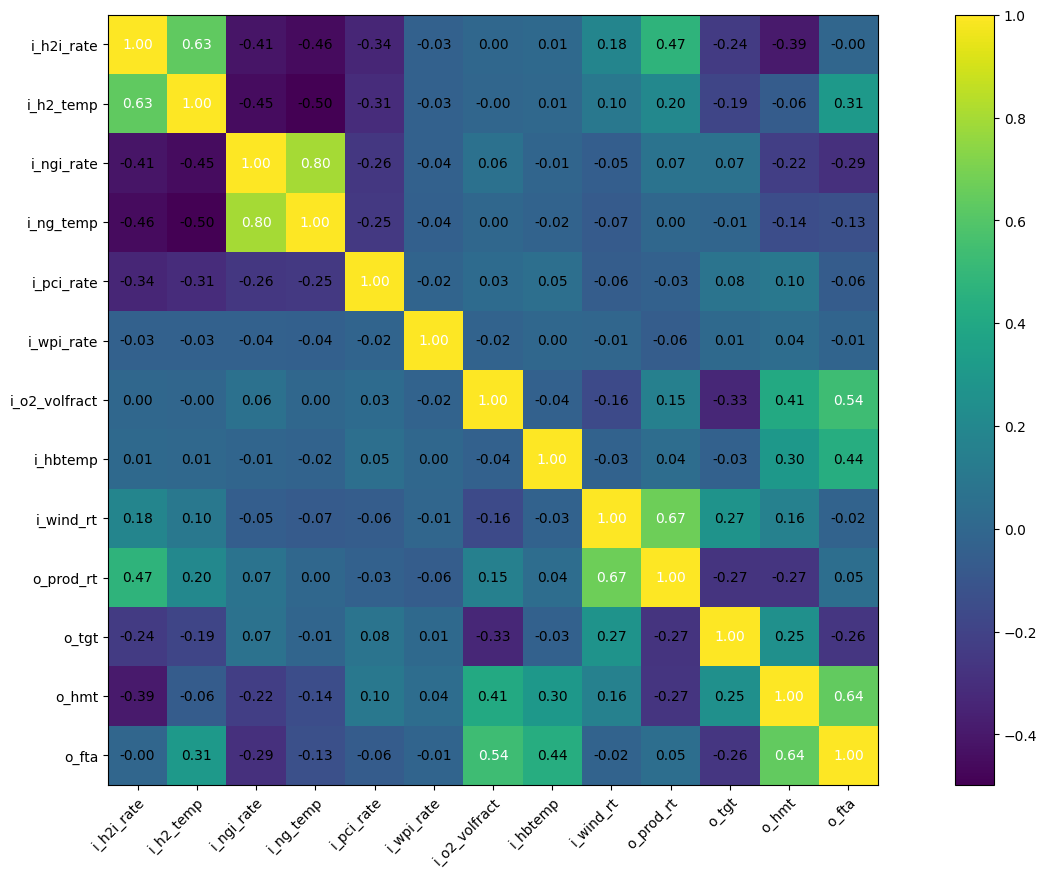

In [11]:


PDFshapingOBJ.list_of_selected_column_names = ['i_h2i_rate','i_h2_temp','i_ngi_rate','i_ng_temp','i_pci_rate',
                    'i_wpi_rate','i_o2_volfract',
                    'i_hbtemp','i_wind_rt','o_prod_rt', 'o_tgt', 'o_hmt','o_fta']



PDFshapingOBJ.print_correlation_coefficients()


In [12]:

PDFshapingOBJ.convert_pd_data_to_numpy()


[[1
  'H2-0_PCI-0_WPI-0_NG-120_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-7_SGI-0_SGT-0_SGC_0 '
  0 ... 63.5 4050.0 1800.0]
 [2
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-1_SGI-0_SGT-0_SGC_0 '
  0 ... 60.6 4060.0 1850.0]
 [3
  'H2-0_PCI-0_WPI-0_NG-100_O2-21_NGT-300_H2T-0_HBT-1200_WR-195_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  0 ... 60.8 4080.0 1850.0]
 ...
 [4997
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1600_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 57.1 11700.0 2380.0]
 [4998
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-3_SGI-0_SGT-0_SGC_0 '
  30 ... 55.7 11800.0 2310.0]
 [4999
  'H2-30_PCI-0_WPI-0_NG-80_O2-30_NGT-300_H2T-300_HBT-1480_WR-230_MHB-5.7_BM-5_SGI-0_SGT-0_SGC_0 '
  30 ... 56.2 11800.0 2310.0]]
(4999, 41)


In [13]:

PDFshapingOBJ.gen_X_y_for_selected_indeces(  
                   inputs = [  2, 3, 5, 6, 8, 9, 10   ] , 
                   outputs= [ 27, 29, 39, 40 ]   
)


## inputs = [ 2, 3, 5, 6, 8, 9, 10  ]          ## the full 7



7
4


In [14]:

print(PDFshapingOBJ.X.shape)
print(PDFshapingOBJ.y.shape)


(4999, 7)
(4999, 4)


In [15]:

PDFshapingOBJ.random_seed = int( random.random() * 100  )         ## defautl is 42


In [16]:

PDFshapingOBJ.split_np_data_train_test(selected_test_size=0.2)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [17]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 7)
(1000, 7)
(3999, 4)
(1000, 4)


In [18]:

from sklearn.decomposition import PCA

# Instantiate PCA to reduce to 4 components
pca = PCA(n_components=4)

# Fit on training data and transform both train and test
X_train_pca = pca.fit_transform(PDFshapingOBJ.X_train)
X_test_pca  = pca.transform(PDFshapingOBJ.X_test)

# Replace the original inputs with PCA-reduced versions
PDFshapingOBJ.X_train = X_train_pca
PDFshapingOBJ.X_test  = X_test_pca





In [19]:

print(PDFshapingOBJ.X_train.shape)
print(PDFshapingOBJ.X_test.shape)

print(PDFshapingOBJ.y_train.shape)
print(PDFshapingOBJ.y_test.shape)


(3999, 4)
(1000, 4)
(3999, 4)
(1000, 4)


In [20]:

PDFshapingOBJ.convert_dataset_from_np_to_torch()


In [21]:

PDFshapingOBJ.standardize_X_scales()
PDFshapingOBJ.standardize_y_scales()


In [22]:


PDFshapingOBJ.gen_Dataloader_train()

PDFshapingOBJ.train_dl



## Model Forward ( 7x4 )


In [23]:


#############################################################
##   F1      plus       F2
## Linear     +      Nonlinear

class F1plusF2_SIO_Forward(nn.Module):
    ## initialize the layers
    def __init__(self, x_means, x_deviations, y_means, y_deviations,  device='cuda'):
        super().__init__()
        self.device = device
        
        ## self.x_means      = x_means
        ## self.x_deviations = x_deviations
        ## self.y_means      = y_means
        ## self.y_deviations = y_deviations
        
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)
        
        
        
        ## F1
        self.f1_linear1 = nn.Linear(7, 4)       
        
        ## F2
        self.f2_linear1 = nn.Linear(7, 10)
        self.f2_act1    = nn.Sigmoid()                    ## Tanh()                       
        self.f2_linear2 = nn.Linear(10, 4)       
        self.f2_dropout = nn.Dropout(0.25)
        
        # Move model to device
        self.to(self.device)
        
        
    ## perform inference
    def forward(self, x):
        x = x.to(self.device)
        x = (x - self.x_means) / self.x_deviations
        
        ## F1
        f1 = self.f1_linear1(x)
        
        ## F2
        f2 = self.f2_linear1(x)
        f2 = self.f2_act1(f2)
        f2 = self.f2_dropout(f2)
        f2 = self.f2_linear2(f2)
        
        
        y_scaled   = f1 + f2
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    




In [24]:

n_inputs  = 4     ## 7
n_outputs = 4





    
class ResidualNet_Forward(nn.Module):
    def __init__(self, x_means, x_deviations, y_means, y_deviations, dropout_rate=0.1, device='cuda'):
        
        super().__init__()
        self.device = device
        
        self.x_means      = x_means.to(self.device)
        self.x_deviations = x_deviations.to(self.device)
        self.y_means      = y_means.to(self.device)
        self.y_deviations = y_deviations.to(self.device)

     
        self.fc1  = nn.Linear(n_inputs, 64)
        self.act1 = nn.ReLU()
        self.dropout1 = nn.Dropout(dropout_rate)

        self.fc2 = nn.Linear(64, 64)
        self.act2 = nn.ReLU()
        self.dropout2 = nn.Dropout(dropout_rate)

        self.fc3 = nn.Linear(64, n_outputs)

        # If input_dim ≠ 64, project for residual addition
        self.input_proj = nn.Linear(n_inputs, 64) if n_inputs != 64 else nn.Identity()
        
        # Move model to device
        self.to(self.device)
        

    def forward(self, x):
        x  = x.to(self.device)
        x  = (x - self.x_means) / self.x_deviations
        x0 = self.input_proj(x)
        x1 = self.dropout1(self.act1(self.fc1(x)))
        x2 = self.dropout2(self.act2(self.fc2(x1)))
        x_res = x2 + x0
        y_scaled = self.fc3(x_res)
        y_descaled = y_scaled * self.y_deviations + self.y_means
        
        return y_descaled, y_scaled
    

    


In [25]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## model_Forward     = F1plusF2_SIO_Forward(

model_Forward     =     ResidualNet_Forward(
                         PDFshapingOBJ.x_means, 
                         PDFshapingOBJ.x_deviations, 
                         PDFshapingOBJ.y_means, 
                         PDFshapingOBJ.y_deviations,
                         device=device  # pass device into the model
    
)

optimizer = optim.Adam(model_Forward.parameters(), lr=0.001)
loss_fn   = nn.MSELoss()



In [26]:

model_Forward.train()

for epoch in range(1000):
    for xb, yb in PDFshapingOBJ.train_dl:
        
        xb = xb.to(model_Forward.device)
        yb = yb.to(model_Forward.device)
        
        optimizer.zero_grad()
        pred_descaled, pred_scaled = model_Forward(xb)
        loss = loss_fn(pred_scaled, yb)
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch, ".....", loss.item() ) 
    



0 ..... 0.7204750776290894
100 ..... 0.2997051775455475
200 ..... 0.3190789818763733
300 ..... 0.41196292638778687
400 ..... 0.2563692629337311
500 ..... 0.39735788106918335
600 ..... 0.451156884431839
700 ..... 0.578833818435669
800 ..... 0.4653974175453186
900 ..... 0.5028602480888367


In [27]:

print("=== SANITY CHECK: SCALING ===")
print("y_means:", PDFshapingOBJ.y_means)
print("y_deviations:", PDFshapingOBJ.y_deviations)

print("===============================================")

print("x_means:", PDFshapingOBJ.x_means)
print("x_deviations:", PDFshapingOBJ.x_deviations)


=== SANITY CHECK: SCALING ===
y_means: tensor([[  97.5890, 1295.2369, 8455.7021, 2305.4663]])
y_deviations: tensor([[  50.3373,  522.0273, 1522.9727,  210.2900]])
x_means: tensor([[    -0.0000,      0.0000,     -0.0000,      0.0000]])
x_deviations: tensor([[363.7590, 158.2943,  51.4527,  31.2668]])


In [28]:

print(PDFshapingOBJ.y_means -  PDFshapingOBJ.y_deviations)
print(PDFshapingOBJ.y_means +  PDFshapingOBJ.y_deviations)


tensor([[  47.2517,  773.2096, 6932.7295, 2095.1763]])
tensor([[ 147.9263, 1817.2643, 9978.6748, 2515.7563]])



## Is model  invertible ?

* use the Jacobian


In [29]:

import torch
from torch.autograd.functional import jacobian


In [30]:

## x = torch.randn(1, 7, requires_grad=True)

x = torch.randn(      7, requires_grad=True)  # shape [7]

x = torch.randn(      4, requires_grad=True)  # shape [7]


In [31]:

def wrapped_model(x):
    y_descaled, _ = model_Forward(x)
    return y_descaled  # Only return 1 tensor to get a clean Jacobian




In [32]:

## J = jacobian(model_Forward, x)

J = jacobian(wrapped_model, x)


In [33]:

print( len(J) )


1


In [34]:


print( J.shape )  # Should be [1, 4, 7]


torch.Size([1, 4, 4])


In [35]:

u, s, v = torch.svd(J)  


In [36]:

rank = (s > 1e-5).sum()


In [37]:


print("Local Jacobian rank:", rank.item())


Local Jacobian rank: 4



## Example of Min Norm Solution


In [38]:

import torch
from torch.autograd.functional import jacobian

def solve_minimum_norm_update(x0, target_y):
    """
    Computes a minimum-norm update step for the input x0 towards the target_y.
    
    Args:
        model (nn.Module): The neural network.
        x0 (torch.Tensor): Initial guess for the input.
        target_y (torch.Tensor): The desired output.

    Returns:
        torch.Tensor: The minimum-norm update to x0 (Delta x).
    """
    # Ensure the input requires gradients
    
    x = x0.detach().clone().requires_grad_(True)
    
    # Define a function to compute the output for use with jacobian()
    ## def func(input_x):
    ##    return model(input_x)

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y = target_y - current_y
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    J_pinv = torch.pinverse(J)
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    delta_x = J_pinv @ delta_y
    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x


###################################################################
# Example usage with a simple model (ensure model is defined)
## model = model_Forward()

input_dim  = 4
output_dim = 4

x0       = torch.randn(1, input_dim)

target_y = torch.randn(1, output_dim)
delta_x = solve_minimum_norm_update( x0, target_y)

x_new = x0 + delta_x

print( x_new )



tensor([[7301.0635,  753.7331,  242.3953,   82.7203]], grad_fn=<AddBackward0>)



## Approach


In [39]:


def solve_minimum_norm_update( x0, target_y):
   
    
    # Ensure the input requires gradients

    x = x0.detach().clone().requires_grad_(True)
    

    # Compute the Jacobian matrix at the current input x
    # 'create_graph=True' is often needed if you want to backpropagate through this process
    
    J = jacobian(wrapped_model, x, create_graph=True, vectorize=True)
    
    # Calculate the current residual (difference between desired and actual output)
    current_y = wrapped_model(x)
    delta_y   = target_y - current_y
    
    # Flatten the Jacobian and residual if necessary (depends on problem dimensions)
    # This example assumes J is 2D and delta_y is 1D for simplicity
    if J.dim() > 2:
        J = J.view(-1, x.numel())
        delta_y = delta_y.view(-1)
        
    # Compute the pseudoinverse of the Jacobian using SVD
    J_pinv = torch.pinverse(J)
    
    # Calculate the minimum norm update: Delta x = J_pinv @ Delta y
    delta_x = J_pinv @ delta_y
    
    # Reshape delta_x to match the original input shape
    delta_x = delta_x.view_as(x0)
    
    return delta_x







In [40]:


# x0       = torch.randn(1, input_dim)
# target_y = torch.randn(1, output_dim)
##print(PDFshapingOBJ.X_test.shape)
##print(PDFshapingOBJ.y_test.shape)





for i in range(  PDFshapingOBJ.X_test.shape[0]  ):
    
    target_y  = torch.tensor( PDFshapingOBJ.y_test[i]   )    ## what you want?
    x0        = torch.tensor( PDFshapingOBJ.X_test[i]   )    ## guess
    
    delta_x = solve_minimum_norm_update(x0, target_y)
    
    x_new = x0 + delta_x
    
    x_new = x_new.detach().numpy()
    x0_7  = x0.detach().numpy()
    
    x0_7       = pca.inverse_transform( x0_7  ) 
    x_solution = pca.inverse_transform( x_new )
    
    print( x0_7 )
    print( x_solution )
    
    print(i)
    print('********************************')



[  20.57360139    0.69997096    0.73197708   25.00714279  299.99562582
 1600.04084774  202.48925082]
[  23.9846474    13.27182465  -37.52573269   24.56678448  276.27661999
 1817.81404457  203.29685463]
0
********************************
[   7.75020275    2.39852887  102.47321135   25.92672487  300.02994214
 1600.21847413  193.98088015]
[ -24.66827075   -4.61834166  251.37073508   26.29827115 -732.77869071
 1741.4072284   181.44118127]
1
********************************
[   9.89090801    1.70633297   42.76893295   25.47052685   -0.14350754
 1200.01480349  201.42048948]
[   1.804094      6.88572361  122.37354886   25.84090962   74.09273296
 1755.06326584  191.03809663]
2
********************************
[  11.96958      -0.75847862   69.21159191   25.70155048  300.11634891
 1480.03713196  197.70916256]
[  25.08281841   -3.29997816  104.3726105    27.1098804  1510.01842853
 1250.10204756  196.40561071]
3
********************************
[  34.32525588   -1.61075352   -1.65890636   25.6635

[   8.97836622   -1.42805667   58.52183416   25.3700829    -0.13327411
 1479.78664405  198.6506482 ]
[   9.62132579    3.4756343    45.53905232   25.37170133   -7.71153273
 1366.70106375  200.02549232]
213
********************************
[  24.25042404   -0.26292712   -0.26770441   25.53539849  599.79187732
 1199.81162643  205.10576698]
[  40.83938093    1.78445897  -11.81206586   25.9251877  1591.9000567
 1566.81066511  203.60959161]
214
********************************
[   2.12356603   -2.64506185  117.27062089   25.79181007   -0.02872647
 1599.76487497  193.17424159]
[  -88.25675753     3.82292924   616.12793403    27.24452924
 -2176.97499517  3345.74519997   140.90832222]
215
********************************
[   7.39606404   68.46945151   -1.58469852   25.55003252   -0.11021255
 1199.79738068  199.76086285]
[  -3.02918263  136.43268316   -1.51327449   25.81888896 -172.62671902
 1305.03843862  193.7046983 ]
216
********************************
[   1.09862259    0.03310149  120.0360

[  -2.08866626   -0.65409798  149.31511543   26.09171025    0.0265567
 1599.98049337  190.37763606]
[  -67.94604501    10.08138085   453.19515721    27.50609307
 -1827.62386335  1553.20303379   164.84862657]
466
********************************
[   8.10936821   -0.20729507   99.78689026   25.9781847   300.02847765
 1480.0046222   195.14951621]
[  -4.57418872   -0.67174176  148.59446623   26.12070613 -145.2576831
 1411.16350142  191.60451215]
467
********************************
[  -2.69010325   92.16349436   62.24383891   26.06895047    0.04314375
 1480.19360155  190.89698059]
[ -43.85409808  174.5053826   200.59125674   27.07842385 -977.30748105
 1552.88177195  172.53780199]
468
********************************
[   4.43798978   90.74156925    0.76506234   25.72931591   -0.06627294
 1200.00799279  197.79453739]
[  -26.72058686   201.67176595    -0.78804364    25.37196598
 -1266.13208071  1400.05292403   187.89598065]
469
********************************
[  -5.32750331  174.07310263   -

[   8.98397211   -1.44842944   58.49607592   25.36970448   -0.13567918
 1479.78899537  198.65437397]
[  115.15342742   -65.0024525   -388.09425847    25.54195422
  3365.61153566 -1095.33357664   256.23845471]
720
********************************
[  19.9287084     1.83648562    1.89940433   25.14435266  299.85391323
 1448.02799577  203.23890386]
[  46.93559516  -27.65120735   25.37851164   27.69761303 2310.40276047
  164.63315073  211.50875028]
721
********************************
[  10.49843552    1.63857964   42.69455101   25.27553294   -0.15461365
 1448.00621046  199.9048258 ]
[  12.97839473    5.85838984   75.58559668   26.02296923  491.63568774
 1390.74817395  197.2036755 ]
722
********************************
[  31.76078717    4.89176152    5.05411823   26.08192247 1199.82491157
 1200.2484262   204.24105756]
[  83.88033431    1.81817396 -139.23197987   27.43238335 3668.68430517
  233.56356936  222.25385717]
723
********************************
[  19.635998      4.47694394    4.630

[  28.83439213    1.66644186    1.71798271   25.57921179  899.86726527
 1480.03216096  203.05621651]
[  24.65092711    1.81641688   17.42928079   25.61225036  750.0366046
 1470.61952494  201.8128975 ]
974
********************************
[  34.04928242   -0.50327689   -0.52128017   25.68147333 1199.79234268
 1599.7995521   202.66850191]
[   332.56020609   -272.14619663    436.36144465     55.88819561
  25103.13192218 -10949.20846892    265.04522916]
975
********************************
[  26.37561194   -4.95260564   -5.12844801   25.14637927  600.34444695
 1599.893412    203.41501277]
[  28.0032306    -5.15880027   -5.62156731   25.38966832  735.73032925
 1414.7036428   204.60925241]
976
********************************
[  20.79026434   -1.60818091   -1.66801626   25.08829401  300.2806748
 1448.10080834  203.80601523]
[  16.47184361  -22.47826552   24.142806     25.26439684  104.36403434
 1134.1320694   205.28027952]
977
********************************
[   4.05851503    0.71826736   9